In [54]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import glob
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [55]:
'''
        Each file contains nine columns and a different number of rows depending on the test length.
        
        1st column is the acceleration data in the X axis measured by the sensor ADXL345.
        2nd column is the acceleration data in the Y axis measured by the sensor ADXL345.
        3rd column is the acceleration data in the Z axis measured by the sensor ADXL345.

        4th column is the rotation data in the X axis measured by the sensor ITG3200.
        5th column is the rotation data in the Y axis measured by the sensor ITG3200.
        6th column is the rotation data in the Z axis measured by the sensor ITG3200.

        7th column is the acceleration data in the X axis measured by the sensor MMA8451Q.
        8th column is the acceleration data in the Y axis measured by the sensor MMA8451Q.
        9th column is the acceleration data in the Z axis measured by the sensor MMA8451Q.
        
        Data are in bits with the following characteristics:

        ADXL345:
        Resolution: 13 bits
        Range: +-16g

        ITG3200
        Resolution: 16 bits
        Range: +-2000°/s

        MMA8451Q:
        Resolution: 14 bits
        Range: +-8g
'''

'\n        Each file contains nine columns and a different number of rows depending on the test length.\n        \n        1st column is the acceleration data in the X axis measured by the sensor ADXL345.\n        2nd column is the acceleration data in the Y axis measured by the sensor ADXL345.\n        3rd column is the acceleration data in the Z axis measured by the sensor ADXL345.\n\n        4th column is the rotation data in the X axis measured by the sensor ITG3200.\n        5th column is the rotation data in the Y axis measured by the sensor ITG3200.\n        6th column is the rotation data in the Z axis measured by the sensor ITG3200.\n\n        7th column is the acceleration data in the X axis measured by the sensor MMA8451Q.\n        8th column is the acceleration data in the Y axis measured by the sensor MMA8451Q.\n        9th column is the acceleration data in the Z axis measured by the sensor MMA8451Q.\n        \n        Data are in bits with the following characteristics:\

In [56]:
datapath = "./data/SisFall.csv"

df = pd.read_csv(datapath, index_col=0)
df.head(10)

,ADXL_x,ADXL_y,ADXL_z,ITG_x,ITG_y,ITG_z,MMA_x,MMA_y,MMA_z,subject,activity,trial
NaN,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,SA01,D01,R01
0.0,17.0,-179.0,-99.0,-18.0,-504.0,-352.0,76.0,-697.0,-279.0,SA01,D01,R01
1.0,15.0,-174.0,-90.0,-53.0,-568.0,-306.0,48.0,-675.0,-254.0,SA01,D01,R01
2.0,1.0,-176.0,-81.0,-84.0,-613.0,-271.0,-2.0,-668.0,-221.0,SA01,D01,R01
3.0,-10.0,-180.0,-77.0,-104.0,-647.0,-227.0,-34.0,-697.0,-175.0,SA01,D01,R01
4.0,-21.0,-191.0,-63.0,-128.0,-675.0,-191.0,-74.0,-741.0,-133.0,SA01,D01,R01
5.0,-37.0,-225.0,-59.0,-146.0,-700.0,-159.0,-110.0,-840.0,-103.0,SA01,D01,R01
6.0,-36.0,-243.0,-46.0,-166.0,-722.0,-131.0,-147.0,-948.0,-75.0,SA01,D01,R01
7.0,-44.0,-271.0,-38.0,-190.0,-738.0,-107.0,-171.0,-1073.0,-38.0,SA01,D01,R01
8.0,-51.0,-312.0,-33.0,-210.0,-752.0,-90.0,-200.0,-1191.0,3.0,SA01,D01,R01


In [57]:
print (df.columns)
print (set(df['subject']))
features = df.copy()

dnum = 200
fnum = 365

Index(['ADXL_x', 'ADXL_y', 'ADXL_z', 'ITG_x', 'ITG_y', 'ITG_z', 'MMA_x',
       'MMA_y', 'MMA_z', 'subject', 'activity', 'trial'],
      dtype='object')
{'SE14', 'SA04', 'SA16', 'SA15', 'SE10', 'SA07', 'SE05', 'SE02', 'SA19', 'SA08', 'SE01', 'SA20', 'SA21', 'SE12', 'SE09', 'SA01', 'SA23', 'SE03', 'SE15', 'SA12', 'SE13', 'SA11', 'SA03', 'SE11', 'SA05', 'SA18', 'SA17', 'SE06', 'SA09', 'SA06', 'SE08', 'SA22', 'SA02', 'SA13', 'SA10', 'SA14', 'SE04', 'SE07'}


In [58]:
D01 = features[features['activity']=='D01'].head(dnum).copy()
D02 = features[features['activity']=='D02'].head(dnum).copy()
D03 = features[features['activity']=='D03'].head(dnum).copy()
D04 = features[features['activity']=='D04'].head(dnum).copy()
D05 = features[features['activity']=='D05'].head(dnum).copy()
D06 = features[features['activity']=='D06'].head(dnum).copy()
D07 = features[features['activity']=='D07'].head(dnum).copy()
D08 = features[features['activity']=='D08'].head(dnum).copy()
D09 = features[features['activity']=='D09'].head(dnum).copy()
D10 = features[features['activity']=='D10'].head(dnum).copy()
D11 = features[features['activity']=='D11'].head(dnum).copy()
D12 = features[features['activity']=='D12'].head(dnum).copy()
D13 = features[features['activity']=='D13'].head(dnum).copy()
D14 = features[features['activity']=='D14'].head(dnum).copy()
D15 = features[features['activity']=='D15'].head(dnum).copy()
D16 = features[features['activity']=='D16'].head(dnum).copy()
D17 = features[features['activity']=='D17'].head(dnum).copy()
D18 = features[features['activity']=='D18'].head(dnum).copy()
D19 = features[features['activity']=='D19'].head(dnum).copy()

In [59]:
F01 = features[features['activity']=='F01'].head(fnum).copy()
F02 = features[features['activity']=='F02'].head(fnum).copy()
F03 = features[features['activity']=='F03'].head(fnum).copy()
F04 = features[features['activity']=='F04'].head(fnum).copy()
F05 = features[features['activity']=='F05'].head(fnum).copy()
F06 = features[features['activity']=='F06'].head(fnum).copy()
F07 = features[features['activity']=='F07'].head(fnum).copy()
F08 = features[features['activity']=='F08'].head(fnum).copy()
F09 = features[features['activity']=='F09'].head(fnum).copy()
F10 = features[features['activity']=='F10'].head(fnum).copy()
F11 = features[features['activity']=='F11'].head(fnum).copy()
F12 = features[features['activity']=='F12'].head(fnum).copy()
F13 = features[features['activity']=='F13'].head(fnum).copy()
F14 = features[features['activity']=='F14'].head(fnum).copy()
F15 = features[features['activity']=='F15'].head(fnum).copy()

In [60]:
df = pd.DataFrame()
df = pd.concat([df, F01, F02, F03, F04, F05, F06, F07, F08, F09, F10, F11, F12, F13, F14, F15])
df = pd.concat([df, D01, D02, D03, D04, D05, D06, D07, D08, D09, D10, D11, D15, D16, D17, D18, D19])

In [61]:
df['activity'].value_counts()

activity
F01    357
F09    357
F02    357
F15    357
F14    357
F13    357
F11    357
F10    357
F12    357
F08    357
F07    357
F06    357
F05    357
F04    357
F03    357
D09    200
D18    200
D17    200
D16    200
D15    200
D11    200
D10    200
D01    200
D08    200
D07    200
D06    200
D05    200
D04    200
D03    200
D02    200
D19    200
Name: count, dtype: int64

In [62]:
features = df.copy()

In [63]:
features = features.replace({'activity':'D01'},0)
features = features.replace({'activity':'D01'},0)
features = features.replace({'activity':'D02'},0)
features = features.replace({'activity':'D03'},0)
features = features.replace({'activity':'D04'},0)
features = features.replace({'activity':'D05'},0)
features = features.replace({'activity':'D06'},0)
features = features.replace({'activity':'D07'},0)
features = features.replace({'activity':'D08'},0)
features = features.replace({'activity':'D09'},0)
features = features.replace({'activity':'D10'},0)
features = features.replace({'activity':'D11'},0)
features = features.replace({'activity':'D12'},0)
features = features.replace({'activity':'D13'},0)
features = features.replace({'activity':'D14'},0)
features = features.replace({'activity':'D15'},0)
features = features.replace({'activity':'D16'},0)
features = features.replace({'activity':'D17'},0)
features = features.replace({'activity':'D18'},0)
features = features.replace({'activity':'D19'},0)
features = features.replace({'activity':'F01'},1)
features = features.replace({'activity':'F02'},1)
features = features.replace({'activity':'F03'},1)
features = features.replace({'activity':'F04'},1)
features = features.replace({'activity':'F05'},1)
features = features.replace({'activity':'F06'},1)
features = features.replace({'activity':'F07'},1)
features = features.replace({'activity':'F08'},1)
features = features.replace({'activity':'F09'},1)
features = features.replace({'activity':'F10'},1)
features = features.replace({'activity':'F11'},1)
features = features.replace({'activity':'F12'},1)
features = features.replace({'activity':'F13'},1)
features = features.replace({'activity':'F14'},1)
features = features.replace({'activity':'F15'},1)
features = features.replace({'activity':'F15'},1)

/var/folders/_z/gryfr07n59jgb3wrd062h1ym0000gn/T/ipykernel_73709/4220643108.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  features = features.replace({'activity':'F15'},1)


In [64]:
features['activity'].value_counts()

activity
1    5355
0    3200
Name: count, dtype: int64

In [65]:
features

,ADXL_x,ADXL_y,ADXL_z,ITG_x,ITG_y,ITG_z,MMA_x,MMA_y,MMA_z,subject,activity,trial
NaN,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,SA01,1,R01
0.0,-9.0,-257.0,-25.0,84.0,247.0,27.0,-120.0,-987.0,63.0,SA01,1,R01
1.0,-3.0,-263.0,-23.0,99.0,258.0,35.0,-110.0,-1016.0,68.0,SA01,1,R01
2.0,-1.0,-270.0,-22.0,114.0,272.0,45.0,-94.0,-1037.0,69.0,SA01,1,R01
3.0,1.0,-277.0,-24.0,127.0,286.0,57.0,-81.0,-1062.0,69.0,SA01,1,R01
...,...,...,...,...,...,...,...,...,...,...,...,...
194.0,4.0,-259.0,-21.0,-56.0,2.0,-5.0,18.0,-1008.0,35.0,SA01,0,R01
195.0,9.0,-261.0,-27.0,-59.0,2.0,-5.0,23.0,-1014.0,35.0,SA01,0,R01
196.0,4.0,-261.0,-25.0,-62.0,3.0,-5.0,20.0,-1011.0,33.0,SA01,0,R01
197.0,4.0,-262.0,-21.0,-65.0,3.0,-4.0,18.0,-1009.0,36.0,SA01,0,R01


In [70]:
print (set(features['subject']))

{'SA01'}


In [75]:
features = features[[ft for ft in features.columns if ft not in ['subject', 'trial']]]
print(features.columns)

Index(['ADXL_x', 'ADXL_y', 'ADXL_z', 'ITG_x', 'ITG_y', 'ITG_z', 'MMA_x',
       'MMA_y', 'MMA_z', 'activity'],
      dtype='object')


In [85]:
from sklearn.preprocessing import StandardScaler

feature_columns = [col for col in features.columns if col != 'activity']

scaler = StandardScaler()

features_scaled = features.copy()
features_scaled[feature_columns] = scaler.fit_transform(features[feature_columns])

In [86]:
adl_count = features_scaled['activity'].value_counts()[0]
fall_count = features_scaled['activity'].value_counts()[1]

adl_mask = features_scaled['activity'] == 0
adl_data = features_scaled[adl_mask]
adl1 = adl_data.iloc[:int(adl_count * 0.6)]
adl2 = adl_data.iloc[int(adl_count * 0.6):]

fall_mask = features_scaled['activity'] == 1
fall_data = features_scaled[fall_mask]
fall1 = fall_data.iloc[:int(fall_count * 0.6)]
fall2 = fall_data.iloc[int(fall_count * 0.6):]

print(adl1.shape, adl2.shape, fall1.shape, fall2.shape)

(1920, 10) (1280, 10) (3213, 10) (2142, 10)


In [87]:
def split_sequences(sequences, n_steps):
    X, y = [], []
    for i in range(len(sequences) - n_steps + 1):
        end_ix = i + n_steps
        
        seq_x = sequences.iloc[i:end_ix].iloc[:, :-1] 
        seq_y = sequences.iloc[end_ix-1].iloc[-1]     
        
        X.append(seq_x.values)  
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [88]:
WINDOW_LENGTH = 20
train_data, train_labels = split_sequences(adl1, WINDOW_LENGTH)
test_data, test_labels = split_sequences(pd.concat([adl2, fall2]), WINDOW_LENGTH)
print (f"after : {train_data.shape}, {test_data.shape}")

after : (1901, 20, 9), (3403, 20, 9)


-----

In [89]:
# Input:      (256, 9)
# Level 1:    (128, 64)   # spatial ↓, channels ↑
# Level 2:    (64, 128)   # spatial ↓, channels ↑
# Level 3:    (32, 256)   # spatial ↓, channels ↑
# Level 4:    (16, 512)   # spatial ↓, channels ↑
#     (16, 1024)
# Level 4:    (32, 512)   # spatial ↑, channels ↓
# Level 3:    (64, 256)   # spatial ↑, channels ↓
# Level 2:    (128, 128)  # spatial ↑, channels ↓
# Level 1:    (256, 64)   # spatial ↑, channels ↓
# Output:     (256, 9)

In [90]:
class DoubleConv(tf.keras.layers.Layer):
    """Double convolution block for U-Net"""
    def __init__(self, filters):
        super(DoubleConv, self).__init__()
        self.conv1 = tf.keras.layers.Conv1D(filters//2, 3, padding='same')
        self.bn1 = tf.keras.layers.BatchNormalization()
        self.conv2 = tf.keras.layers.Conv1D(filters//2, 3, padding='same')
        self.bn2 = tf.keras.layers.BatchNormalization()
        self.relu = tf.keras.layers.ReLU()
        self.dropout = tf.keras.layers.Dropout(0.1)
    
    def call(self, x, training=False):
        x = self.conv1(x)
        x = self.bn1(x, training=training)
        x = self.relu(x)
        x = self.dropout(x, training=training)
        
        x = self.conv2(x)
        x = self.bn2(x, training=training)
        x = self.relu(x)
        x = self.dropout(x, training=training)
        return x

In [99]:
class UNetDiffusion(tf.keras.Model):
    def __init__(self):
        super(UNetDiffusion, self).__init__()
        
        # Encoder part
        # Input: (20, 9)  # [window_length, num_sensors]
        self.enc1 = tf.keras.Sequential([
            DoubleConv(8),  
            tf.keras.layers.MaxPooling1D(2)  # Output: (10, 8)
        ])
        
        self.enc2 = tf.keras.Sequential([
            DoubleConv(16),  
            tf.keras.layers.MaxPooling1D(2)  # Output: (5, 16)
        ])
        
        # Bottleneck
        self.bottleneck = DoubleConv(32)  # Output: (5, 32)
        
        # Decoder part
        self.dec2 = tf.keras.Sequential([
            tf.keras.layers.UpSampling1D(2),  # (10, 32)
            DoubleConv(16)  # Output: (10, 16)
        ])
        
        self.dec1 = tf.keras.Sequential([
            tf.keras.layers.UpSampling1D(2),  # (20, 16)
            DoubleConv(8)  # Output: (20, 8)
        ])
        
        # Final convolution
        self.final = tf.keras.layers.Conv1D(9, 1, padding='same')  # Output: (20, 9)
        
    def call(self, x, training=False):
        # Encoder path with skip connections
        enc1_before_pool = x  # (20, 9)
        enc1_output = self.enc1(x, training=training)  # (10, 8)
        
        enc2_before_pool = enc1_output
        enc2_output = self.enc2(enc1_output, training=training)  # (5, 16)
        
        # Bottleneck
        bottleneck = self.bottleneck(enc2_output, training=training)  # (5, 32)
        
        # Decoder path with skip connections
        dec2_output = self.dec2(bottleneck, training=training)  # (10, 16)
        dec2_output = tf.concat([enc2_before_pool, dec2_output], axis=-1)  # Concatenate along feature dimension
        
        dec1_output = self.dec1(dec2_output, training=training)  # (20, 8)
        dec1_output = tf.concat([enc1_before_pool, dec1_output], axis=-1)  # Concatenate along feature dimension
        
        # Final convolution
        output = self.final(dec1_output)  # (20, 9)
        
        return output

In [100]:
def forward_diffusion(x, noise_level=0.2):
    dtype = x.dtype
    noise = tf.random.normal(shape=tf.shape(x), dtype=dtype) * noise_level
    return x + noise

def anomaly_score(x_real, x_recon):
    return tf.reduce_mean(tf.abs(x_real - x_recon), axis=1)

In [101]:
BATCH_SIZE = 64
EPOCHS = 50
INITIAL_LEARNING_RATE = 0.005
DECAY_STEPS = 500
DECAY_RATE = 0.95

In [102]:
model = UNetDiffusion()
optimizer = tf.keras.optimizers.Adam(
    tf.keras.optimizers.schedules.ExponentialDecay(
        INITIAL_LEARNING_RATE, DECAY_STEPS, DECAY_RATE
    )
)

In [104]:
from tqdm.auto import tqdm

train_dataset = tf.data.Dataset.from_tensor_slices(train_data.astype('float32'))
train_dataset = train_dataset.batch(BATCH_SIZE)

for epoch in range(EPOCHS):
    train_loss = 0
    n_batches = len(train_data) // BATCH_SIZE
    
    pbar = tqdm(enumerate(train_dataset), 
                desc=f'Epoch {epoch+1}/{EPOCHS}', 
                total=n_batches,
                leave=False)
    
    for i, batch_data in pbar:        
        with tf.GradientTape() as tape:
            noisy = forward_diffusion(batch_data, noise_level=0.25)
            reconstructed = model(noisy, training=True)
            loss = tf.reduce_mean(tf.square(reconstructed - batch_data))
        
        grads = tape.gradient(loss, model.trainable_variables)
        grads, _ = tf.clip_by_global_norm(grads, clip_norm=1.0) 
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        
        train_loss += loss.numpy()
        pbar.set_postfix({'Loss': f'{loss.numpy():.4f}'})
    
    avg_loss = train_loss / n_batches
    print(f'Epoch {epoch+1}/{EPOCHS} - Loss: {avg_loss:.4f}')

Epoch 1/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 1/50 - Loss: 2.6564


2025-02-05 12:34:23.881613: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 2/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 2/50 - Loss: 1.6195


2025-02-05 12:34:31.128850: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 3/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 3/50 - Loss: 0.9817


2025-02-05 12:34:38.577863: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 4/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 4/50 - Loss: 0.5854


2025-02-05 12:34:46.909777: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 5/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 5/50 - Loss: 0.3513


2025-02-05 12:34:54.417103: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 6/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 6/50 - Loss: 0.2196


2025-02-05 12:35:02.505809: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 7/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 7/50 - Loss: 0.1482


2025-02-05 12:35:10.238070: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 8/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 8/50 - Loss: 0.1074


2025-02-05 12:35:17.930228: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 9/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 9/50 - Loss: 0.0854


2025-02-05 12:35:25.295660: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 10/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 10/50 - Loss: 0.0716


2025-02-05 12:35:33.124770: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 11/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 11/50 - Loss: 0.0631


2025-02-05 12:35:41.248256: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 12/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 12/50 - Loss: 0.0579


2025-02-05 12:35:49.723156: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 13/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 13/50 - Loss: 0.0546


2025-02-05 12:35:56.875619: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 14/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 14/50 - Loss: 0.0519


2025-02-05 12:36:04.126994: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 15/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 15/50 - Loss: 0.0515


2025-02-05 12:36:11.596962: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 16/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 16/50 - Loss: 0.0507


2025-02-05 12:36:18.772696: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 17/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 17/50 - Loss: 0.0530


2025-02-05 12:36:26.079382: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 18/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 18/50 - Loss: 0.0567


2025-02-05 12:36:34.055189: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 19/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 19/50 - Loss: 0.0677


2025-02-05 12:36:42.651325: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 20/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 20/50 - Loss: 0.0748


2025-02-05 12:36:49.692456: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 21/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 21/50 - Loss: 0.0722


2025-02-05 12:36:56.679296: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 22/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 22/50 - Loss: 0.0656


2025-02-05 12:37:03.708701: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 23/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 23/50 - Loss: 0.0637


2025-02-05 12:37:10.735754: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 24/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 24/50 - Loss: 0.0636


2025-02-05 12:37:17.706541: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 25/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 25/50 - Loss: 0.0632


2025-02-05 12:37:26.204828: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 26/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 26/50 - Loss: 0.0646


2025-02-05 12:37:33.739596: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 27/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 27/50 - Loss: 0.0645


2025-02-05 12:37:40.764192: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 28/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 28/50 - Loss: 0.0669


2025-02-05 12:37:47.688719: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 29/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 29/50 - Loss: 0.0713


2025-02-05 12:37:54.643508: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 30/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 30/50 - Loss: 0.0713


2025-02-05 12:38:01.639174: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 31/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 31/50 - Loss: 0.0659


2025-02-05 12:38:09.229143: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 32/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 32/50 - Loss: 0.0620


2025-02-05 12:38:16.276493: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 33/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 33/50 - Loss: 0.0600


2025-02-05 12:38:23.305924: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 34/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 34/50 - Loss: 0.0613


2025-02-05 12:38:30.423001: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 35/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 35/50 - Loss: 0.0584


2025-02-05 12:38:37.408117: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 36/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 36/50 - Loss: 0.0565


2025-02-05 12:38:44.415771: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 37/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 37/50 - Loss: 0.0525


2025-02-05 12:38:51.352352: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 38/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 38/50 - Loss: 0.0515


2025-02-05 12:38:58.308606: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 39/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 39/50 - Loss: 0.0490


2025-02-05 12:39:05.428723: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 40/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 40/50 - Loss: 0.0498


2025-02-05 12:39:12.491956: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 41/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 41/50 - Loss: 0.0485


2025-02-05 12:39:19.573143: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 42/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 42/50 - Loss: 0.0496


2025-02-05 12:39:26.726902: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 43/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 43/50 - Loss: 0.0486


2025-02-05 12:39:33.837705: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 44/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 44/50 - Loss: 0.0503


2025-02-05 12:39:40.781475: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 45/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 45/50 - Loss: 0.0495


2025-02-05 12:39:47.706227: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 46/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 46/50 - Loss: 0.0518


2025-02-05 12:39:54.954386: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 47/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 47/50 - Loss: 0.0515


2025-02-05 12:40:03.974664: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 48/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 48/50 - Loss: 0.0533


2025-02-05 12:40:11.892936: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 49/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 49/50 - Loss: 0.0535


2025-02-05 12:40:19.979614: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 50/50:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch 50/50 - Loss: 0.0557


2025-02-05 12:40:27.890026: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [105]:
def flatten(X):
    flattened_X = np.empty((X.shape[0], X.shape[2]))  # sample x features array.
    for i in range(X.shape[0]):
        flattened_X[i] = X[i, (X.shape[1]-1), :]
    return(flattened_X)

In [106]:
from sklearn.metrics import mean_squared_error

valid_x_predictions = model.predict(test_data)
error = flatten(test_data) - flatten(valid_x_predictions)

valid_mse = np.mean(np.power(flatten(test_data) - flatten(valid_x_predictions), 2), axis=1)

error_df = pd.DataFrame({
    'reconstruction_error': valid_mse,
    'true_class': test_labels
})

error_df

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


,reconstruction_error,true_class
0,0.000356,0.0
1,0.000607,0.0
2,0.000464,0.0
3,0.000695,0.0
4,0.000314,0.0
...,...,...
3398,0.013748,1.0
3399,0.012343,1.0
3400,0.014407,1.0
3401,0.017522,1.0


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


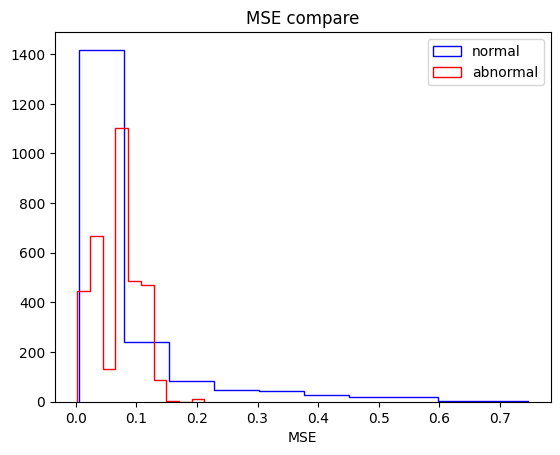

In [107]:
X_pred_train = model.predict(train_data)
scored_train = np.mean(np.abs(flatten(train_data) - flatten(X_pred_train)), axis=1)
X_pred_test = model.predict(test_data)
scored_test = np.mean(np.abs(flatten(test_data) - flatten(X_pred_test)), axis=1)

plt.title('MSE compare') 
plt.hist(scored_train, bins=10, color='blue', histtype='step', label='normal') 
plt.hist(scored_test, bins=10, color='red', histtype='step', label='abnormal') 
plt.xlabel('MSE')
plt.legend()
plt.show()

In [108]:
error_df['true_class'].value_counts()

true_class
1.0    2142
0.0    1261
Name: count, dtype: int64

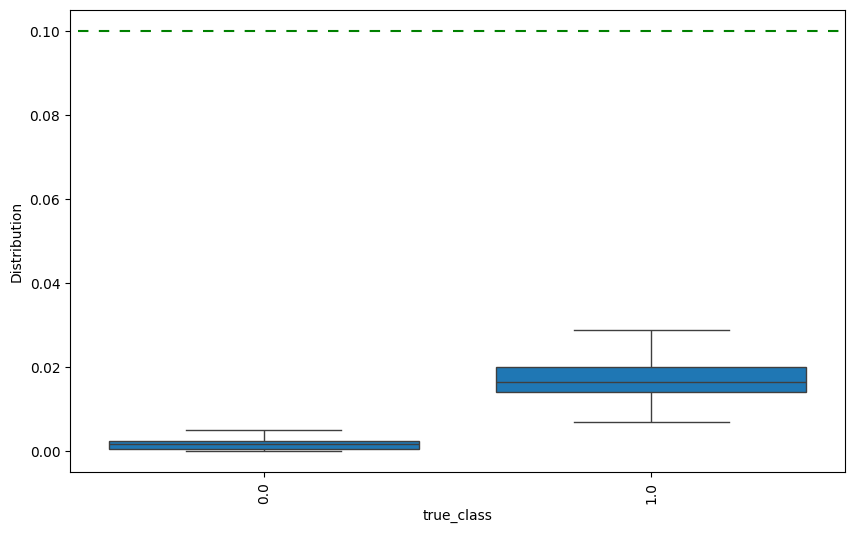

In [109]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='true_class', y='reconstruction_error', data=error_df, showfliers=False, saturation=1)
plt.ylabel('Distribution')

plt.axhline(y= 0.1, xmin=0.01, xmax=1,dashes=(5,5), c='g')

plt.xticks(rotation=90)
plt.show()

In [112]:
threshold = 0.005

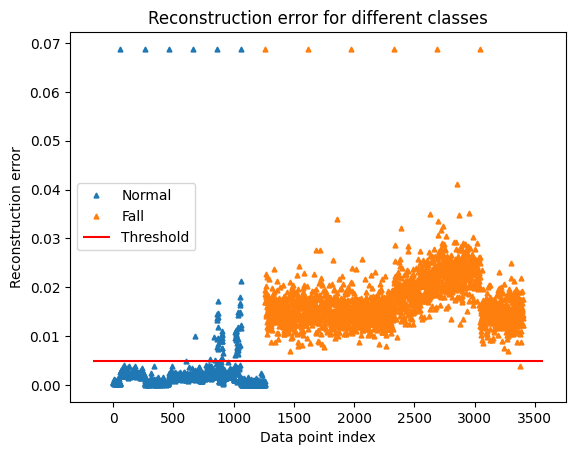

In [113]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='^', ms=3.5, linestyle='',
            label= "Normal" if name == 0 else "Fall")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

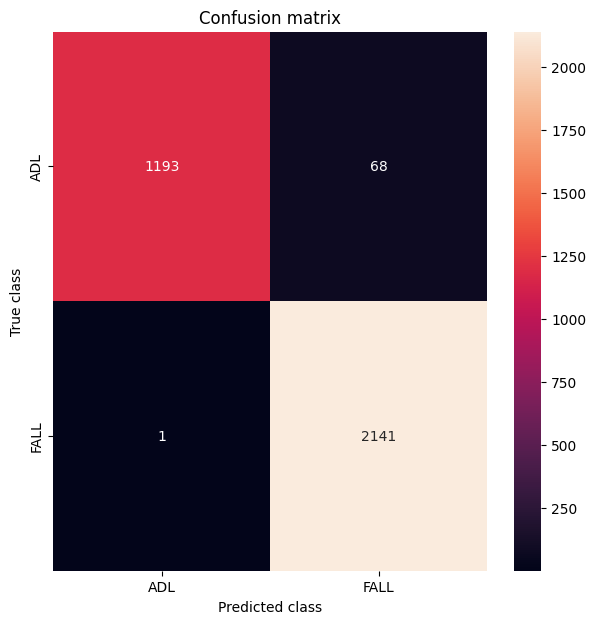

In [118]:
LABELS = ["ADL", "FALL"]

plt.figure(figsize=(7, 7))
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()